Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop other two features for simplicity.

Figure out if any preprocessing such as scaling would help here

Draw elbow plot and from that figure out optimal value of k

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading dataset

from sklearn.datasets import load_iris

iris_data = load_iris()

In [4]:
df = pd.DataFrame(iris_data.data,columns=iris_data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df = df.drop(['sepal length (cm)', 'sepal width (cm)'], axis = 1)

In [8]:
df.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


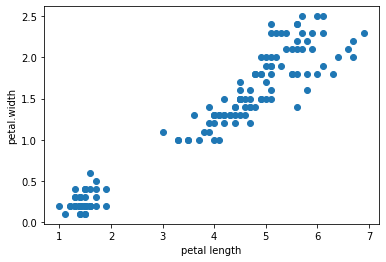

In [9]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'])
plt.xlabel('petal length')
plt.ylabel('petal.width')
plt.show()

In [10]:
km = KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['petal length (cm)', 'petal width (cm)']])
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [11]:
df['cluster'] = y_predicted
df.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [12]:
km.cluster_centers_

array([[1.462     , 0.246     ],
       [5.59583333, 2.0375    ],
       [4.26923077, 1.34230769]])

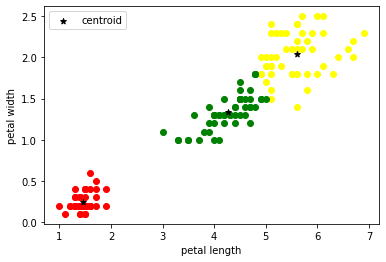

In [14]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color = 'red')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color = 'yellow')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color = 'green')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'black', marker = '*', label = 'centroid')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend()

In [15]:
#The cluster are in right shape, so need of MinMaxScaler()

In [25]:
#elbow plot

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['petal length (cm)', 'petal width (cm)']])
    sse.append(km.inertia_)

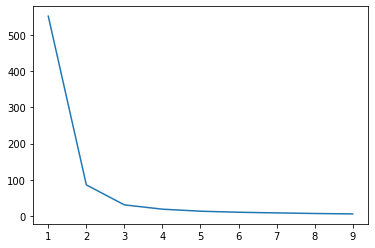

In [29]:
plt.plot(k_rng,sse)